# Content based recommendation system

Importing libraries

In [15]:
import  numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


Reaading dataset

In [12]:
movies = pd.read_csv(r"C:\Users\rvbha\OneDrive\Desktop\movies_metadata.csv")

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
movies['overview'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

Vectorization of the column 'overview'

In [19]:
tfidf = TfidfVectorizer(stop_words = 'english')
movies['overview'] = movies['overview'].fillna('')


In [22]:
#constructing utility matrix
utility_matrix = tfidf.fit_transform(movies['overview'])
utility_matrix
utility_matrix.shape

(45466, 75827)

In [23]:
#construction similarity matrix
similarity_matrix = linear_kernel(utility_matrix,utility_matrix)
similarity_matrix

array([[1.        , 0.01504121, 0.        , ..., 0.        , 0.00595453,
        0.        ],
       [0.01504121, 1.        , 0.04681953, ..., 0.        , 0.02198641,
        0.00929411],
       [0.        , 0.04681953, 1.        , ..., 0.        , 0.01402548,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00595453, 0.02198641, 0.01402548, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00929411, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Index Mapping

In [60]:
mapping = pd.Series(movies.index,index = movies['title'])
mapping


title
Toy Story                          0
Jumanji                            1
Grumpier Old Men                   2
Waiting to Exhale                  3
Father of the Bride Part II        4
                               ...  
Subdue                         45461
Century of Birthing            45462
Betrayal                       45463
Satan Triumphant               45464
Queerama                       45465
Length: 45466, dtype: int64

Creating Recommendation Function

In [64]:
def Recommendation(movie_name):
    movie_index = mapping[movie_name]
    similarity_score = list(enumerate(similarity_matrix[movie_index]))
    similarity_score = sorted(similarity_score,reverse=True)
    similarity_score = similarity_score[1:15]
    movie_indices = [i[0] for i in similarity_score]
    return (movies['title'].iloc[movie_indices])

Executing the Function

In [46]:
movies['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                         Subdue
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45466, dtype: object

In [67]:
Recommendation('Jumanji')

45464                    Satan Triumphant
45463                            Betrayal
45462                 Century of Birthing
45461                              Subdue
45460                          Robin Hood
45459                     Caged Heat 3000
45458                 The Burkittsville 7
45457           Shadow of the Blair Witch
45456                    House of Horrors
45455           St. Michael Had a Rooster
45454                   The Morning After
45453                                 Mom
45452                         Deep Hearts
45451    The Fat and Lean Wrestling Match
Name: title, dtype: object

# Content Based Recommendation using BERT

In [74]:

movies = movies[['overview','genres','title']]
movies.head()


,overview,genres,title
0,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men
3,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale
4,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II


Importing packages


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

In [71]:
!pip install sentence_transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=bd806849e89158cdf795f6a3e8e26572b3a55f7a064fd44b999d6eb40f5361ef
  Stored in directory: c:\users\rvbha\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [77]:
x = np.array(movies.overview)
x

array(["Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.",
       "When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.",
       "A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in

In [78]:

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(x, show_progress_bar=True)

Batches:   0%|          | 0/1421 [00:00<?, ?it/s]

Reducing Dimensionality(OPTIONAL)

In [84]:
x = np.array(embeddings)
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit(x)
pca_df = pd.DataFrame(pca.transform(x))
pca_df.head()

,0,1,2,3,4
0,-2.047117,1.968885,-2.528924,-0.900947,1.697184
1,-2.840933,-0.811657,-0.618671,1.929616,0.027949
2,-3.932031,1.461672,1.890074,-0.195430,-0.552504
3,-0.478850,5.716183,3.340977,1.862921,1.756529
4,-0.588680,5.723562,0.169577,-1.608571,-1.602642


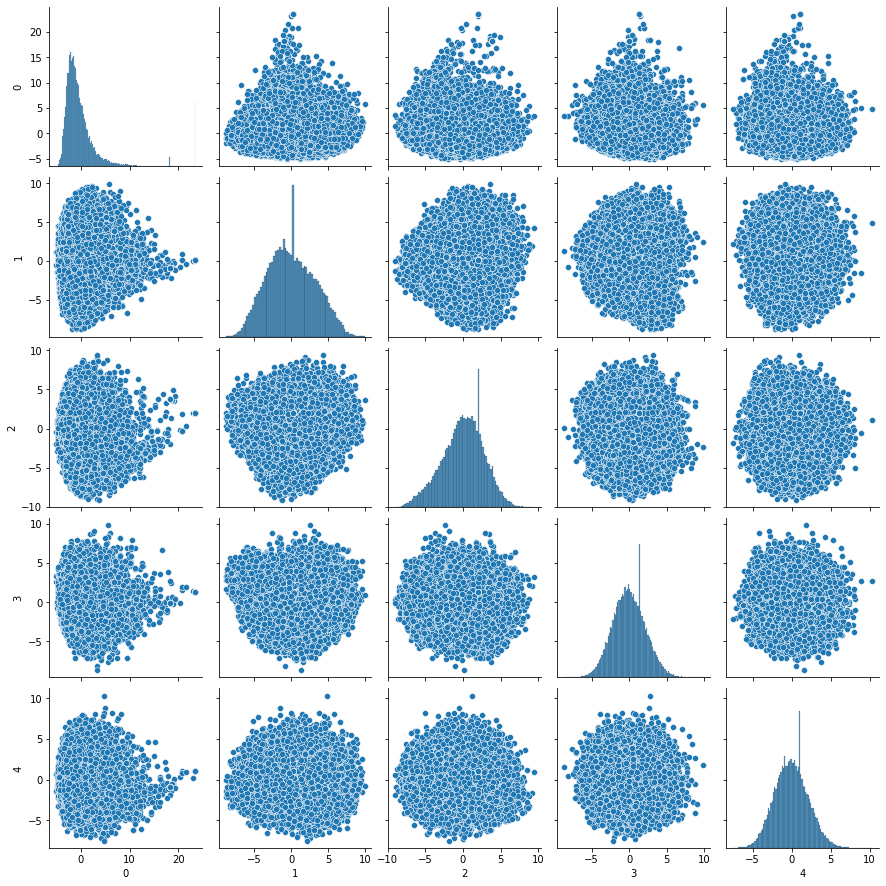

In [86]:
sns.pairplot(pca_df)

In [100]:
from sklearn.metrics.pairwise import cosine_similarity
cos_data = pd.DataFrame(cosine_similarity(x))
def recommendations(index,print_recommendation = False,print_plots= False,print_genres =False):
  index_recomm =cos_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  movies['title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(movies['title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(movies['overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = movies['overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(movies['genres'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = movies['genres'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

In [112]:
recommendations(7,True,True,True)

The watched movie is this one: Tom and Huck 

The number 1 recommended movie is this one: The Boys Club 

The number 1 recommended movie is this one: The Brass Legend 

The number 1 recommended movie is this one: The Burglar’s Dilemma 

The number 1 recommended movie is this one: Suicide Kings 

The number 1 recommended movie is this one: Zatôichi's Vengeance 

The plot of the watched movie is this one:
 A mischievous young boy, Tom Sawyer, witnesses a murder by the deadly Injun Joe. Tom becomes friends with Huckleberry Finn, a boy with no future and no family. Tom has to choose between honoring a friendship or honoring an oath because the town alcoholic is accused of the murder. Tom and Huck go through several adventures trying to retrieve evidence. 

The plot of the number 1 recommended movie is this one:
 Three teenage boys in small-town Southern Ontario are thrilled when Luke Cooper, a mysterious American fugitive with a gunshot wound in his leg, decides to crash their secret hideo

{'Movies': array(['The Boys Club', 'The Brass Legend', 'The Burglar’s Dilemma',
        'Suicide Kings', "Zatôichi's Vengeance"], dtype=object),
 'Index': [33161, 28946, 38052, 1701, 22283]}

# Collaborative Recommendation(Correlation Coefficient)

In [128]:
df1 =pd.read_csv( r"C:\Users\rvbha\OneDrive\Desktop\movies.csv")
df2 =pd.read_csv( r"C:\Users\rvbha\OneDrive\Desktop\ratings.csv")

In [129]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [130]:
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [132]:
ratings = pd.merge(df1,df2).drop(['genres','timestamp'],axis=1)
ratings

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [160]:
user_Rating = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
user_Rating = user_Rating.dropna(thresh=5).fillna(0)
user_Rating

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [161]:
corrMatrix = user_Rating.corr(method='pearson')
corrMatrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,-0.001642,-0.002324,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,0.135943,-0.004325,...,-0.001642,0.339935,0.542247,0.706526,-0.001642,-0.007675,0.134327,0.325287,-0.008185,-0.001642
'Hellboy': The Seeds of Creation (2004),-0.001642,1.000000,0.706526,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Round Midnight (1986),-0.002324,0.706526,1.000000,-0.002324,-0.003191,-0.002324,0.170199,-0.002324,-0.014958,-0.006121,...,-0.002324,-0.006495,-0.003975,-0.003289,-0.002324,-0.010863,-0.010961,-0.005087,-0.011585,-0.002324
'Salem's Lot (2004),-0.001642,-0.001642,-0.002324,1.000000,0.857269,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Til There Was You (1997),-0.002254,-0.002254,-0.003191,0.857269,1.000000,-0.002254,-0.008797,-0.002254,-0.014510,-0.005938,...,-0.002254,-0.006301,-0.003856,-0.003191,-0.002254,-0.010538,-0.010632,-0.004935,-0.011238,-0.002254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),-0.007675,-0.007675,-0.010863,-0.007675,-0.010538,-0.007675,0.187953,0.212646,0.053614,0.115396,...,-0.007675,-0.021449,-0.013126,-0.010863,-0.007675,1.000000,0.163022,-0.016800,0.138611,-0.007675
xXx (2002),0.134327,-0.007744,-0.010961,-0.007744,-0.010632,-0.007744,0.062174,-0.007744,0.241092,-0.000060,...,0.063291,0.291410,0.163464,0.240394,-0.007744,0.163022,1.000000,0.259049,0.065673,-0.007744
xXx: State of the Union (2005),0.325287,-0.003594,-0.005087,-0.003594,-0.004935,-0.003594,-0.014025,-0.003594,0.139511,-0.009467,...,-0.003594,0.376455,0.172818,0.227658,-0.003594,-0.016800,0.259049,1.000000,-0.017917,-0.003594


In [162]:
def recommendation(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    return similar_ratings

In [163]:
action = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action:
    similar_movies = similar_movies.append(recommendation(movie,rating))

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

Amazing Spider-Man, The (2012)                           8.262335
Mission: Impossible III (2006)                           8.199621
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    7.492567
Total Recall (2012)                                      6.620709
Over the Hedge (2006)                                    6.299157
Mission: Impossible - Ghost Protocol (2011)              6.245232
Toy Story 3 (2010)                                       6.186486
The Amazing Spider-Man 2 (2014)                          6.178875
Hancock (2008)                                           6.167351
Jumper (2008)                                            6.165987
Fantastic Four (2005)                                    6.140215
Snakes on a Plane (2006)                                 6.110051
Incredible Hulk, The (2008)                              6.070605
Crank (2006)                                             6.058822
Hellboy (2004)                                           5.993228
X-Men: The